# 第2スクリーニング　スコアリング　No. ２

# 1. 市町村の 高齢化率と人口増減率、高齢化率と転入超過率の相関分析、クラスタ分析を行う

In [1]:
cd /Users/shintaro/Downloads/クラスター分析

/Users/shintaro/Downloads/クラスター分析


In [2]:
#モジュールのインポート　
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples
from matplotlib.font_manager import FontProperties
import math
import sys
if sys.platform.startswith('win'):
    FontPath = 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath = '/System/Library/Fonts/ヒラギノ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
else:
    print('このPythonコードが対応していないOSを使用しています．')
    sys.exit()
import japanize_matplotlib

In [3]:
#ファイルの読み込み
data = pd.read_csv("/Users/shintaro/Downloads/クラスター分析/人口データ.csv", encoding = "utf-8")

In [4]:
data

調査年           地域 可住地面積１km2当たり人口密度【人】 昼夜間人口比率【％】 外国人人口（人口10万人当たり）【人】  \
0     2015年度      北海道 札幌市              4433.5      100.4               451.8   
1     2015年度  北海道 札幌市 中央区              8856.8      162.7               795.8   
2     2015年度   北海道 札幌市 北区              4515.3       95.9                 709   
3     2015年度   北海道 札幌市 東区              4598.2       94.6                 428   
4     2015年度  北海道 札幌市 白石区              6090.8       98.6               283.9   
...      ...          ...                 ...        ...                 ...   
1911  2015年度     沖縄県 久米島町                 194      100.5               438.4   
1912  2015年度     沖縄県 八重瀬町              1163.1         86               206.4   
1913  2015年度     沖縄県 多良間村                75.2       98.8              1172.5   
1914  2015年度      沖縄県 竹富町                70.7        105               950.5   
1915  2015年度     沖縄県 与那国町               151.2      102.6               596.9   

     15歳未満人口割合【％】 15～64歳人口割合【％】 65歳以上人口割合【％】 未婚者割合（15歳以上人口）【％】 人口増減率【％】  ...  \
0           11.32        63.283       24.767          29.83508     2.03  ...   
1          10.099        67.475       21.267          36.29654     7.92  ...   
2          11.536        62.719       24.169          30.80597     2.35  ...   
3          11.728        64.259       23.461          30.39551     2.36  ...   
4          11.256         65.31       22.845          31.27262     2.61  ...   
...           ...           ...          ...               ...      ...  ...   
1911       15.706        57.705        26.46          27.68735    -8.97  ...   
1912       18.286        61.969       19.301          30.53678     8.94  ...   
1913        17.42        56.198       26.382          24.44219    -3.01  ...   
1914       17.009        61.756        19.96            31.146      3.6  ...   
1915       12.534        68.964       18.502          26.81564    11.23  ...   

     転入率（日本人移動者）【％】 転出率（日本人移動者）【％】 核家族世帯割合【％】 高齢夫婦のみの世帯の割合【％】 高齢単身世帯の割合【％】  \
0              6.19           5.78      53.63           10.72        11.37   
1              9.02           7.63      39.98            7.24        10.93   
2              5.65           5.19      52.53           10.65           11   
3               6.1           5.53       52.8            9.78        11.31   
4              6.67           6.45      49.24            8.61         11.4   
...             ...            ...        ...             ...          ...   
1911           5.22           5.98      53.51            9.85        12.65   
1912           5.91           4.46      68.12            7.75         7.38   
1913           4.52           7.54      57.02           10.43        10.85   
1914          14.53          13.56      39.23            5.99          9.9   
1915           8.74           8.36      29.47            5.65         7.88   

       総人口【人】  総人口（男）【人】  総人口（女）【人】  地価公示　商業地最高価格  地価公示　住宅地平均価格  
0     1952356     910614    1041742        5350.0       82500.0  
1      237627     107756     129871        5350.0      178300.0  
2      285321     134534     150787        2400.0       70200.0  
3      261912     124649     137263         376.0       81100.0  
4      209584      99020     110564         333.0       85100.0  
...       ...        ...        ...           ...           ...  
1911     7755       4086       3669           NaN           NaN  
1912    29066      14247      14819           NaN       67800.0  
1913     1194        639        555           NaN           NaN  
1914     3998       2057       1941           NaN           NaN  
1915     1843       1147        696           NaN           NaN  

[1916 rows x 21 columns]

In [5]:
#元データの長さを取得
len_data1 = len(data)
len_data1

1916

In [6]:
#各カラムの名前を読み込む
columns = data.columns

#各データの取り出し
pref_name = data[columns[1]].tolist()
data1 = data[columns[2]].tolist()
data2 = data[columns[3]].tolist()
data3 = data[columns[4]].tolist()
data4 = data[columns[5]].tolist()
data5 = data[columns[6]].tolist()
data6 = data[columns[7]].tolist()
data7 = data[columns[8]].tolist()
data8 = data[columns[9]].tolist()
data9 = data[columns[10]].tolist()
data10 = data[columns[11]].tolist()
data11 = data[columns[12]].tolist()
data12 = data[columns[13]].tolist()
data13 = data[columns[14]].tolist()
data14 = data[columns[15]].tolist()
data15 = data[columns[16]].tolist()
data16 = data[columns[17]].tolist()
data17 = data[columns[18]].tolist()

Dataset = [[]for i in range(18)]
Data_proc_tmp = [[]for i in range(18)]

Dataset[0] = data1
Dataset[1] = data2
Dataset[2] = data3
Dataset[3] = data4
Dataset[4] = data5
Dataset[5] = data6
Dataset[6] = data7
Dataset[7] = data8
Dataset[8] = data9 
Dataset[9] = data10
Dataset[10] = data11
Dataset[11] = data12
Dataset[12] = data13
Dataset[13] = data14
Dataset[14] = data15
Dataset[15] = data16
Dataset[16] = data17
Dataset[17] = pref_name

#データの整形(データが欠損している箇所は一括消去)
for i in range(len_data1):
    if Dataset[0][i] != '-' and Dataset[1][i] != '-' and Dataset[2][i] != '-' and Dataset[3][i] != '-' and Dataset[4][i] != '-' and Dataset[5][i] != '-' and Dataset[6][i] != '-' and Dataset[7][i] != '-' and Dataset[8][i] != '-' and Dataset[9][i] != '-' and Dataset[10][i] != '-' and Dataset[11][i] != '-' and Dataset[12][i] != '-' and Dataset[13][i] != '-' and Dataset[14][i] != '-' and Dataset[15][i] != '-' and Dataset[16][i] != '-':
        for j in range(18):
            Data_proc_tmp[j].append(Dataset[j][i])
            
len_data2 = len(Data_proc_tmp[0])
Data_proc = [[]for i in range(18)]

for i in range(17):
    for j in range(len_data2):
        Data_proc[i].append(float(Data_proc_tmp[i][j]))

for i in range(len_data2):
    Data_proc[17].append(Data_proc_tmp[17][i])

Dataframe = [[]for i in range(18)]

for i in range(len_data2):
    if Data_proc[7][i] > -80:
        for j in range(18):
            Dataframe[j].append(Data_proc[j][i])
            
len_Data = len(Dataframe[0])

In [7]:
X = [[]for i in range(len_Data)]

In [8]:
for i in range(len_Data):
    X[i].append(Dataframe[5][i])
    X[i].append(Dataframe[7][i])
    
import numpy as np
X = np.array(X)

In [9]:
x1 = np.array(Dataframe[5])
x2 = np.array(Dataframe[7])

print(np.cov(x1, x2))
print(np.corrcoef(x1, x2))

[[ 52.18530706 -32.08924143]
 [-32.08924143  29.40262416]]
[[ 1.         -0.81920441]
 [-0.81920441  1.        ]]


In [10]:
Y = [[] for i in range(len_Data)]

In [11]:
for i in range(len_Data):
    Y[i].append(Dataframe[5][i])
    Y[i].append(Dataframe[8][i])

Y = np.array(Y)

In [12]:
y1 = np.array(Dataframe[5])
y2 = np.array(Dataframe[8])

print(np.cov(y1, y2))
print(np.corrcoef(y1, y2))

[[52.18530706 -2.79696121]
 [-2.79696121  0.53193007]]
[[ 1.         -0.53086617]
 [-0.53086617  1.        ]]


In [13]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


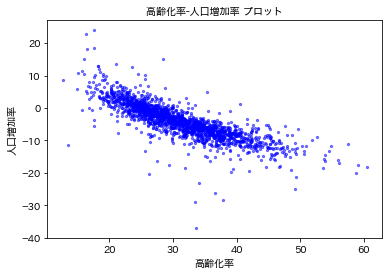

In [14]:
jpfont = FontProperties(fname = FontPath)
plt.scatter(Dataframe[5], Dataframe[7], marker = 'o', s = 5, color = 'b', alpha = 0.5)
plt.xlabel("高齢化率", fontproperties = jpfont)
plt.ylabel("人口増加率", fontproperties = jpfont)
plt.title("高齢化率-人口増加率 プロット", fontproperties = jpfont)
#plt.savefig('高齢化率-人口増加率', dpi = 2000)
plt.show()

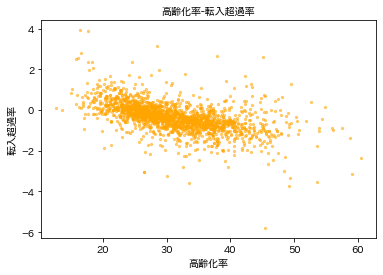

In [15]:
jpfont = FontProperties(fname = FontPath)
plt.scatter(Dataframe[5], Dataframe[8], marker = 'o', s = 5, color = 'orange', alpha = 0.5)
plt.xlabel("高齢化率", fontproperties = jpfont)
plt.ylabel("転入超過率", fontproperties = jpfont)
plt.title("高齢化率-転入超過率", fontproperties = jpfont)
plt.savefig('/Users/shintaro/Downloads/高齢化率-転入超過率.png', dpi = 2000)
plt.show()

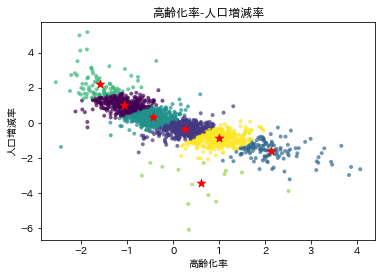

In [16]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X)
X_norm = sc.transform(X)
cls = KMeans(n_clusters = 7)
result = cls.fit(X_norm)
plt.xlabel('高齢化率')
plt.ylabel('人口増減率')
plt.title('高齢化率-人口増減率')
plt.scatter(X_norm[:,0], X_norm[:,1], marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')

plt.savefig('/Users/shintaro/Downloads/クラスタリング-7_改.png', dpi = 2000)
plt.show()

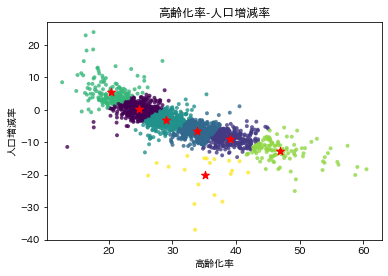

In [17]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

cls = KMeans(n_clusters = 7)
result = cls.fit(X)
plt.scatter(X[:,0], X[:,1], marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.8)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')
plt.xlabel('高齢化率')
plt.ylabel('人口増減率')
plt.title('高齢化率-人口増減率')
#plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 15, c = 'k', alpha = 0.8)
plt.savefig('/Users/shintaro/Downloads/クラスタリング_人口増減率_改.png', dpi = 2000)
plt.show()

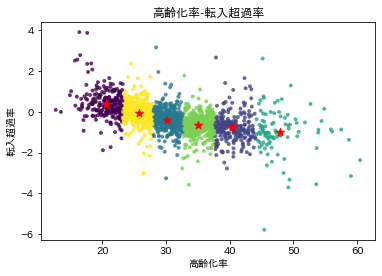

In [18]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

cls = KMeans(n_clusters = 6)
result = cls.fit(Y)
plt.scatter(Y[:,0], Y[:,1], marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.8)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')
plt.xlabel('高齢化率')
plt.ylabel('転入超過率')
plt.title('高齢化率-転入超過率')
#plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 15, c = 'k', alpha = 0.8)
plt.savefig('/Users/shintaro/Downloads/クラスタリング_転入超過率_改.png', dpi = 2000)
plt.show()

In [19]:
from matplotlib import pyplot
from numpy import where
from sklearn.manifold import TSNE

#次元圧縮のため、TSNE-Methodを用います
tsne = TSNE(n_components=2, init='pca', random_state=0)
x = tsne.fit_transform(Y)

def plot_clusters(X, cluster_ids):
    for class_value in range(3):
        row_ix = where(cluster_ids == class_value)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    pyplot.show() 

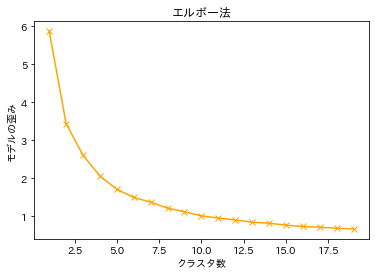

In [27]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Y)
    kmeanModel.fit(Y)
    distortions.append(sum(np.min(cdist(Y, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Y.shape[0])

# Plot the elbow
pyplot.plot(K, distortions, color = 'orange', marker = 'x')
pyplot.xlabel('クラスタ数')
pyplot.ylabel('モデルの歪み')
pyplot.title('エルボー法')
plt.savefig('エルボー法.png', dpi = 1500)
pyplot.show() 

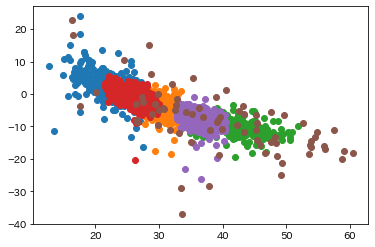

In [31]:
#Gaussian Mixture Model
from numpy import where
def plot_clusters(Y, cluster_ids):
    for class_value in range(6):
        row_ix = where(cluster_ids == class_value)
        pyplot.scatter(Y[row_ix, 0], X[row_ix, 1])
    pyplot.show() 

from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=6)
model.fit(Y)
yhat = model.predict(Y)
plot_clusters(Y, yhat) 

In [44]:
from matplotlib import pyplot
from numpy import where
from sklearn.manifold import TSNE

#次元圧縮のため、TSNE-Methodを用います
tsne = TSNE(n_components=2, init='pca', random_state=0)
x = Y

def plot_clusters(X, cluster_ids):
    for class_value in range(6):
        row_ix = where(cluster_ids == class_value)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1], s = 15, alpha = 0.8)
        pyplot.xlabel('高齢化率')
        pyplot.ylabel('転入超過率')
        pyplot.title('高齢化率-転入超過率')
        pyplot.savefig('高齢化率-転入超過率(GMM).png', dpi = 1500)
    pyplot.show() 

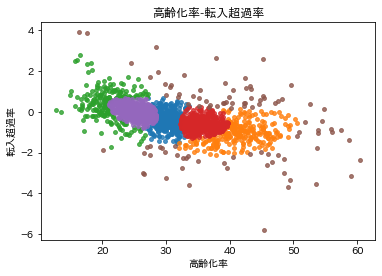

In [45]:
#Gaussian Mixture Model
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=6)
model.fit(x)
yhat = model.predict(x)
plot_clusters(x, yhat) 

In [21]:
import matplotlib.pyplot as plt
distortions = []

for i  in range(1,15):                # 1~10クラスタまで一気に計算 
    km = KMeans(n_clusters=i,)
                #init='k-means++',     # k-means++法によりクラスタ中心を選択
                #n_init=10,
                #max_iter=300,
                #random_state=0)
    km.fit(Y)                         # クラスタリングの計算を実行
    distortions.append(km.inertia_)   # km.fitするとkm.inertia_が得られる

#plt.plot(range(1,15),distortions,marker='o')
#plt.xlabel('Number of clusters')
#plt.ylabel('Distortion')
#plt.show()

In [18]:
km = KMeans(n_clusters= 6,)            # クラスターの個数
            #init='k-means++',        # セントロイドの初期値をランダムに設定
            #n_init=10,               # 異なるセントロイドの初期値を用いたk-meansあるゴリmズムの実行回数
            #max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数
            #tol=1e-04,               # 収束と判定するための相対的な許容誤差
            #random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態
y_km = km.fit_predict(Y)

473
234
428
193
477
96


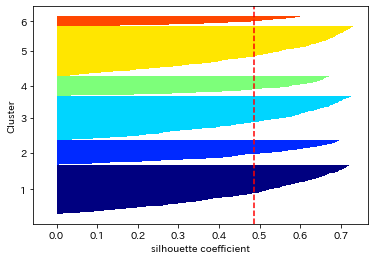

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(Y,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        print(len(c_silhouette_vals))
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()

In [14]:
#クラスタリングの性能評価:シルエット分析
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

#kmeans関数
def kmeans(n_clust):
    km=KMeans(n_clusters=n_clust),
            #init="k-means++",
            #n_init=10,
            #max_iter=300,
            #random_state=0)
    y_km=km.fit_predict(Y)
    return y_km

def n_label(y_km):
    cluster_labels=np.unique(y_km)
    n_clusters=cluster_labels.shape[0]
    return [cluster_labels,n_clusters]

#kを2～10まで探索
for i in range(2,10):
    y_km=kmeans(i)
    nn_l=n_label(y_km)
    cluster_labels=nn_l[0]
    n_clusters=nn_l[1]

  #シルエット係数を計算
    silhouette_vals=silhouette_samples(Y,y_km,metric='euclidean')#ユークリッド距離

    sil=[]#クラスタ内のサンプル数を格納する配列
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals=silhouette_vals[y_km==c]
        sil.append(len(c_silhouette_vals))

  #クラスタのサンプル数の差が10以下であればある程度分割できたとみなす
    if max(sil)-min(sil) < 10:
        print("    best of k:%d"%int(i+1),sil)
    else:
        print("not best of k:%d"%int(i+1),sil)

AttributeError: 'tuple' object has no attribute 'fit_predict'

In [15]:
Y

array([[24.767,  0.42 ],
       [21.267,  1.39 ],
       [24.169,  0.46 ],
       ...,
       [26.382, -3.02 ],
       [19.96 ,  0.98 ],
       [18.502,  0.38 ]])

In [22]:
model = KMeans(n_clusters = 7).fit(X)

In [23]:
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c= color[int(model.labels_[i])])
    #plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 50, c = 'k', alpha = 0.8)
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [24]:
l = model.labels_.tolist()
for i in range(7):
    print(l.count(i))
    
#color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

414
293
465
18
177
435
99


In [25]:
model = KMeans(n_clusters = 6).fit(Y)

<Figure size 432x288 with 0 Axes>

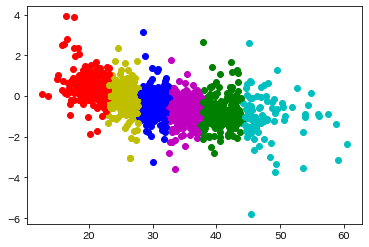

<Figure size 432x288 with 0 Axes>

In [26]:
color = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(Y.shape[0]):
    plt.scatter(Y[i,0], Y[i,1], c = color[int(model.labels_[i])])
#plt.savefig('転入超過率クラスタリング', dpi = 2000)
plt.figure()

In [27]:
l = model.labels_.tolist()
for i in range(6):
    print(l.count(i))
    
#color = ['b', 'g', 'r', 'c', 'm', 'y']

451
238
229
97
419
467


In [28]:
import collections
g = KMeans(n_clusters = 6).fit_predict(Y)
g.tolist()
g = collections.Counter(g)
g

Counter({1: 467, 3: 229, 0: 451, 5: 419, 2: 97, 4: 238})

<Figure size 432x288 with 0 Axes>

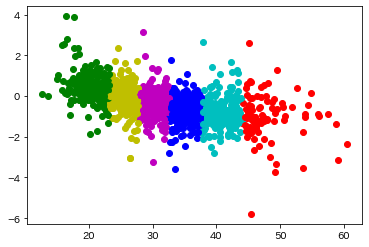

<Figure size 432x288 with 0 Axes>

In [29]:
a = KMeans(n_clusters = 6)
a = a.fit_predict(Y)
a = a.tolist()

color = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(Y.shape[0]):
    plt.scatter(Y[i,0], Y[i,1], c = color[int(a[i])])
#plt.savefig('転入超過率クラスタリング', dpi = 2000)
plt.figure()


In [30]:
for i in range(6):
    print(a.count(i))
    
#color = ['b', 'g', 'r', 'c', 'm', 'y']

417
235
97
233
447
472


In [31]:
"""
dict = {'地域': Dataframe[17], '可住地面積１km2当たり人口密度【人】': Dataframe[0], '昼夜間人口比率【％】': Dataframe[1], '外国人人口（人口10万人当たり）【人】': Dataframe[2], '15歳未満人口割合【％】': Dataframe[3], '15～64歳人口割合【％】': Dataframe[4], '65歳以上人口割合【％】': Dataframe[5], '未婚者割合（15歳以上人口）【％】': Dataframe[6],
       '人口増減率【％】': Dataframe[7], '転入超過率（日本人移動者）【％】': Dataframe[8], '転入率（日本人移動者）【％】': Dataframe[9], '転出率（日本人移動者）【％】': Dataframe[10],'核家族世帯割合【％】': Dataframe[11], '高齢夫婦のみの世帯の割合【％】': Dataframe[12], '高齢単身世帯の割合【％】': Dataframe[13], '総人口【人】': Dataframe[14], '総人口（男）【人】': Dataframe[15], '総人口（女）【人】': Dataframe[16]}
Dafr = pd.DataFrame(dict)
"""

"\ndict = {'地域': Dataframe[17], '可住地面積１km2当たり人口密度【人】': Dataframe[0], '昼夜間人口比率【％】': Dataframe[1], '外国人人口（人口10万人当たり）【人】': Dataframe[2], '15歳未満人口割合【％】': Dataframe[3], '15～64歳人口割合【％】': Dataframe[4], '65歳以上人口割合【％】': Dataframe[5], '未婚者割合（15歳以上人口）【％】': Dataframe[6],\n       '人口増減率【％】': Dataframe[7], '転入超過率（日本人移動者）【％】': Dataframe[8], '転入率（日本人移動者）【％】': Dataframe[9], '転出率（日本人移動者）【％】': Dataframe[10],'核家族世帯割合【％】': Dataframe[11], '高齢夫婦のみの世帯の割合【％】': Dataframe[12], '高齢単身世帯の割合【％】': Dataframe[13], '総人口【人】': Dataframe[14], '総人口（男）【人】': Dataframe[15], '総人口（女）【人】': Dataframe[16]}\nDafr = pd.DataFrame(dict)\n"

In [32]:
#red = KMeans(n_clusters = 6).fit_predict(Y)
#pred.tolist()

In [33]:
#Dafr['cluster_id10'] = pred

In [34]:
#Dafr

In [35]:
#Dafr.to_csv('クラスタリング(高齢化率-転入超過率)(ver1.0).csv', encoding = 'utf-8')

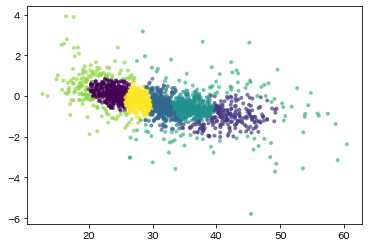

In [36]:
#Gaussian Mixture Method
from sklearn.mixture import GaussianMixture

cls = GaussianMixture(n_components = 7).fit(Y)
labels = cls.predict(Y)
plt.scatter(Y[:,0], Y[:,1],  marker = 'o', linewidth = 0.05, s = 15, c = labels, alpha = 0.7)
#plt.savefig('クラスタリング_スコア', dpi = 2000)
plt.show()

# 2. 全企業の事業所がある場所のみを残す

In [37]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [38]:
#ファイルのデータの読み込み
comp_info = pd.read_csv("fst.screening2(ver1.5)(1).csv")
compname = comp_info['企業名'].tolist()
office_address_files = comp_info['事業所住所'].tolist()

In [39]:
comp_info 

企業名                       file_name               事業所住所  \
0               グンゼ            2021年3月期_決算説明資料.docx             グンゼ.csv   
1             日産自動車                 AR19_J_All.docx                 NaN   
2                大和                             NaN              大和.csv   
3              ゼンリン                21smaterial.docx            ゼンリン.csv   
4    近鉄グループホールディングス  20210519setumeikai_siryou.docx  近鉄グループホールディングス.csv   
..              ...                             ...                 ...   
214            ダスキン                 ダスキン(決算説明).docx           ダスキン.csv   
215          タカラバイオ              タカラバイオ(統合報告書).docx         タカラバイオ.csv   
216           三菱重工業               三菱重工業(統合報告書).docx           三菱重工業.csv   
217            住友化学                住友化学(統合報告書).docx            住友化学.csv   
218            北洋銀行                 北洋銀行(決算説明).docx                 NaN   

    Unnamed: 3  
0          NaN  
1            ?  
2          NaN  
3            ?  
4          NaN  
..         ...  
214        NaN  
215        NaN  
216        NaN  
217        NaN  
218        NaN  

[219 rows x 4 columns]

In [40]:
len_comp_info = len(comp_info)

In [41]:
cd /Users/shintaro/Downloads/事業所住所(ver1.1)

/Users/shintaro/Downloads/事業所住所(ver1.1)


In [42]:
office_address_tmp = [[]for i in range(len_comp_info)]
office_address = [[]for i in range(len_comp_info)]

for i in range(len_comp_info):
    if type(office_address_files[i]) == float:
        office_address_tmp[i] = []
        
    else:
        office_address_tmp[i] = pd.read_csv(office_address_files[i], encoding = 'Shift_JIS')
        
for i in range(len_comp_info):
    if type(office_address_files[i]) == float:
        office_address[i] = []
        
    else:
        office_address[i] = office_address_tmp[i]['事業所住所'].tolist()

In [43]:
#事業所住所をまとめる
office_address_All = []

for i in range(len_comp_info):
    office_address_All += office_address[i]
    
len_All = len(office_address_All)

In [44]:
office_address_Dataframe = [[]for i in range(18)]

In [45]:
for i in range(len_Data):
    if Dataframe[17][i] in office_address_All:
        for j in range(18):
            office_address_Dataframe[j].append(Dataframe[j][i])    

In [46]:
W = [[]for i in range(len(office_address_Dataframe[5]))]

for i in range(len(office_address_Dataframe[5])):
    W[i].append(office_address_Dataframe[5][i])
    W[i].append(office_address_Dataframe[8][i])

In [47]:
W = np.array(W)
W

array([[21.267,  1.39 ],
       [24.169,  0.46 ],
       [23.461,  0.57 ],
       ...,
       [19.868,  0.07 ],
       [24.694, -0.42 ],
       [17.231, -0.21 ]])

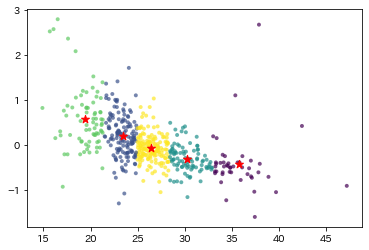

In [48]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

cls = KMeans(n_clusters = 5)
result = cls.fit(W)
plt.scatter(W[:,0], W[:,1], marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')
#plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 15, c = 'k', alpha = 0.8)
#plt.savefig('クラスタリング-7', dpi = 2000)
plt.show()

## 3. 元のクラスター分析のグラフに事業所の散布図を重ね合わせる

In [49]:
len_Df = len(office_address_Dataframe[17])

x = [[] for i in range(len_Df)]

for i in range(len_Df):
    x[i].append(office_address_Dataframe[5][i])
    x[i].append(office_address_Dataframe[7][i])


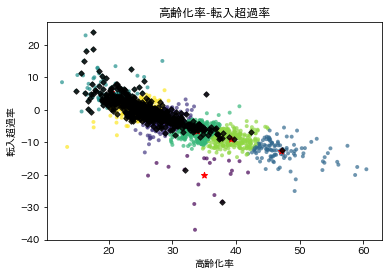

In [50]:
from sklearn.cluster import KMeans

cls = KMeans(n_clusters = 7)
result = cls.fit(X)
plt.xlabel('高齢化率')
plt.ylabel('転入超過率')
plt.title('高齢化率-転入超過率')
plt.scatter(X[:,0], X[:,1],  marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 40, marker = '*', c = 'red')
plt.scatter(office_address_Dataframe[5], office_address_Dataframe[7], marker = 'D', s = 15, c = 'k', alpha = 0.8)
#plt.savefig('クラスタリング_事業所', dpi = 2000)
plt.show()

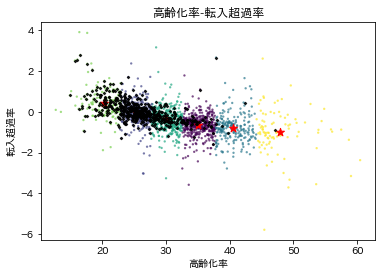

In [51]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

cls = KMeans(n_clusters = 6)
result = cls.fit(Y)
plt.xlabel('高齢化率')
plt.ylabel('転入超過率')
plt.title('高齢化率-転入超過率')
plt.scatter(Y[:,0], Y[:,1], marker = 'o', linewidth = 0.05, s = 5, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 70, marker = '*', c = 'red')
plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 3, c = 'k', alpha = 0.8)
plt.savefig('/Users/shintaro/Downloads/クラスタリング_事業所.png', dpi = 2000)
plt.show()

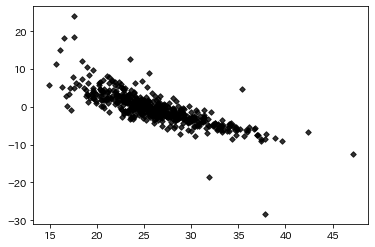

In [52]:
plt.scatter(office_address_Dataframe[5], office_address_Dataframe[7], marker = 'D', s = 15, c = 'k', alpha = 0.8)

# 4. 市町村のそれぞれのスコアを決定する

#### 各クラスターの要素は試行のたびに変化するので、ここでは10回試行してその平均を得点とする

### 4-1 高齢化率-人口増減率

In [53]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [54]:
Data = pd.read_csv("クラスタリング(高齢化率-人口増加率)(ver1.3).csv", encoding = 'utf-8')

In [55]:
Data

Unnamed: 0  可住地面積１km2当たり人口密度【人】  昼夜間人口比率【％】  外国人人口（人口10万人当たり）【人】  \
0              0               4433.5       100.4                451.8   
1              1               8856.8       162.7                795.8   
2              2               4515.3        95.9                709.0   
3              3               4598.2        94.6                428.0   
4              4               6090.8        98.6                283.9   
...          ...                  ...         ...                  ...   
1896        1896                194.0       100.5                438.4   
1897        1897               1163.1        86.0                206.4   
1898        1898                 75.2        98.8               1172.5   
1899        1899                 70.7       105.0                950.5   
1900        1900                151.2       102.6                596.9   

      15歳未満人口割合【％】  15～64歳人口割合【％】  65歳以上人口割合【％】  未婚者割合（15歳以上人口）【％】  人口増減率【％】  \
0           11.320         63.283        24.767           29.83508      2.03   
1           10.099         67.475        21.267           36.29654      7.92   
2           11.536         62.719        24.169           30.80597      2.35   
3           11.728         64.259        23.461           30.39551      2.36   
4           11.256         65.310        22.845           31.27262      2.61   
...            ...            ...           ...                ...       ...   
1896        15.706         57.705        26.460           27.68735     -8.97   
1897        18.286         61.969        19.301           30.53678      8.94   
1898        17.420         56.198        26.382           24.44219     -3.01   
1899        17.009         61.756        19.960           31.14600      3.60   
1900        12.534         68.964        18.502           26.81564     11.23   

      転入超過率（日本人移動者）【％】  ...  cluster_id1  cluster_id2  cluster_id3  \
0                 0.42  ...            3            3            4   
1                 1.39  ...            0            6            0   
2                 0.46  ...            3            3            4   
3                 0.57  ...            3            3            4   
4                 0.21  ...            3            3            4   
...                ...  ...          ...          ...          ...   
1896             -0.76  ...            5            1            2   
1897              1.46  ...            0            6            0   
1898             -3.02  ...            5            1            2   
1899              0.98  ...            0            6            0   
1900              0.38  ...            0            6            0   

      cluster_id4  cluster_id5  cluster_id6  cluster_id7  cluster_id8  \
0               2            0            1            2            2   
1               6            6            3            4            0   
2               2            0            1            2            2   
3               4            0            1            2            2   
4               4            0            1            2            2   
...           ...          ...          ...          ...          ...   
1896            0            2            5            3            5   
1897            6            6            3            4            0   
1898            0            2            5            3            5   
1899            4            6            3            4            0   
1900            6            6            3            4            0   

     cluster_id9  cluster_id10  
0              1             1  
1              2             4  
2              1             1  
3              1             1  
4              1             1  
...          ...           ...  
1896           4             3  
1897           2             4  
1898           4             3  
1899           2             4  
1900           2             4  

[1901 rows x 29 columns]

In [56]:
n1 = Data['cluster_id1'].tolist()
n2 = Data['cluster_id2'].tolist()
n3 = Data['cluster_id3'].tolist()
n4 = Data['cluster_id4'].tolist()
n5 = Data['cluster_id5'].tolist()
n6 = Data['cluster_id6'].tolist()
n7 = Data['cluster_id7'].tolist()
n8 = Data['cluster_id8'].tolist()
n9 = Data['cluster_id9'].tolist()
n10 = Data['cluster_id10'].tolist()

clusters = [[]for i in range(10)]

clusters[0] = n1
clusters[1] = n2
clusters[2] = n3
clusters[3] = n4
clusters[4] = n5
clusters[5] = n6
clusters[6] = n7
clusters[7] = n8
clusters[8] = n9
clusters[9] = n10

In [57]:
import collections

c1 = collections.Counter(n1).most_common()
c2 = collections.Counter(n2).most_common()
c3 = collections.Counter(n3).most_common()
c4 = collections.Counter(n4).most_common()
c5 = collections.Counter(n5).most_common()
c6 = collections.Counter(n6).most_common()
c7 = collections.Counter(n7).most_common()
c8 = collections.Counter(n8).most_common()
c9 = collections.Counter(n9).most_common()
c10 = collections.Counter(n10).most_common()

counters = [[]for i in range(10)]

counters[0] = c1
counters[1] = c2
counters[2] = c3
counters[3] = c4
counters[4] = c5
counters[5] = c6
counters[6] = c7
counters[7] = c8
counters[8] = c9
counters[9] = c10

In [58]:
counters[0]

[(5, 461), (6, 424), (3, 414), (1, 286), (0, 177), (4, 120), (2, 19)]

In [59]:
cluster_id_scores = [[]for i in range(10)]

len_id = len(Data)

for i in range(10):
    for j in range(len_id):
        if clusters[i][j] == counters[i][4][0]:
            cluster_id_scores[i].append(0)
            
        elif clusters[i][j] == counters[i][0][0] or clusters[i][j] == counters[i][2][0]:
            cluster_id_scores[i].append(1)
            
        elif clusters[i][j] == counters[i][1][0] or clusters[i][j] == counters[i][3][0]:
            cluster_id_scores[i].append(2)
            
        elif clusters[i][j] == counters[i][6][0]:
            cluster_id_scores[i].append(3)
            
        elif clusters[i][j] == counters[i][5][0]:
            cluster_id_scores[i].append(4)

In [60]:
cluster_id1 = cluster_id_scores[0]
cluster_id2 = cluster_id_scores[1]
cluster_id3 = cluster_id_scores[2]
cluster_id4 = cluster_id_scores[3]
cluster_id5 = cluster_id_scores[4]
cluster_id6 = cluster_id_scores[5]
cluster_id7 = cluster_id_scores[6]
cluster_id8 = cluster_id_scores[7]
cluster_id9 = cluster_id_scores[8]
cluster_id10 = cluster_id_scores[9]

In [61]:
cluster_id1_np = np.array(cluster_id_scores[0])
cluster_id2_np = np.array(cluster_id_scores[1])
cluster_id3_np = np.array(cluster_id_scores[2])
cluster_id4_np = np.array(cluster_id_scores[3])
cluster_id5_np = np.array(cluster_id_scores[4])
cluster_id6_np = np.array(cluster_id_scores[5])
cluster_id7_np = np.array(cluster_id_scores[6])
cluster_id8_np = np.array(cluster_id_scores[7])
cluster_id9_np = np.array(cluster_id_scores[8])
cluster_id10_np = np.array(cluster_id_scores[9])

In [62]:
cluster_id_np_sum = cluster_id1_np + cluster_id2_np + cluster_id3_np + cluster_id4_np + cluster_id5_np + cluster_id6_np + cluster_id7_np + cluster_id8_np + cluster_id9_np + cluster_id10_np

In [63]:
cluster_id_np_mean = cluster_id_np_sum / 10

In [64]:
Data['cluster_id_score'] = cluster_id_np_mean
#cluster_id_np_mean.tolist()

In [65]:
#Data.to_csv('クラスター分析_スコア(ver1.1).csv')

### 4-2 高齢化率-転入超過率
- この場合、クラスタの要素数のみでは点数をつけられないので転入超過率の数値も利用する

In [66]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [67]:
Data = pd.read_csv("クラスタリング(高齢化率-転入超過率)(ver1.0).csv", encoding = 'utf-8')

In [68]:
Data

Unnamed: 0           地域  可住地面積１km2当たり人口密度【人】  昼夜間人口比率【％】  \
0              0      北海道 札幌市               4433.5       100.4   
1              1  北海道 札幌市 中央区               8856.8       162.7   
2              2   北海道 札幌市 北区               4515.3        95.9   
3              3   北海道 札幌市 東区               4598.2        94.6   
4              4  北海道 札幌市 白石区               6090.8        98.6   
...          ...          ...                  ...         ...   
1896        1896     沖縄県 久米島町                194.0       100.5   
1897        1897     沖縄県 八重瀬町               1163.1        86.0   
1898        1898     沖縄県 多良間村                 75.2        98.8   
1899        1899      沖縄県 竹富町                 70.7       105.0   
1900        1900     沖縄県 与那国町                151.2       102.6   

      外国人人口（人口10万人当たり）【人】  15歳未満人口割合【％】  15～64歳人口割合【％】  65歳以上人口割合【％】  \
0                   451.8        11.320         63.283        24.767   
1                   795.8        10.099         67.475        21.267   
2                   709.0        11.536         62.719        24.169   
3                   428.0        11.728         64.259        23.461   
4                   283.9        11.256         65.310        22.845   
...                   ...           ...            ...           ...   
1896                438.4        15.706         57.705        26.460   
1897                206.4        18.286         61.969        19.301   
1898               1172.5        17.420         56.198        26.382   
1899                950.5        17.009         61.756        19.960   
1900                596.9        12.534         68.964        18.502   

      未婚者割合（15歳以上人口）【％】  人口増減率【％】  ...  cluster_id1  cluster_id2  cluster_id3  \
0              29.83508      2.03  ...            4            0            1   
1              36.29654      7.92  ...            3            5            5   
2              30.80597      2.35  ...            4            0            1   
3              30.39551      2.36  ...            4            0            1   
4              31.27262      2.61  ...            3            5            5   
...                 ...       ...  ...          ...          ...          ...   
1896           27.68735     -8.97  ...            4            0            1   
1897           30.53678      8.94  ...            3            5            5   
1898           24.44219     -3.01  ...            4            0            1   
1899           31.14600      3.60  ...            3            5            5   
1900           26.81564     11.23  ...            3            5            5   

      cluster_id4  cluster_id5  cluster_id6  cluster_id7  cluster_id8  \
0               1            1            0            4            4   
1               4            5            5            1            0   
2               1            1            0            4            4   
3               1            1            0            4            4   
4               1            1            5            1            0   
...           ...          ...          ...          ...          ...   
1896            1            1            0            4            4   
1897            4            5            5            1            0   
1898            1            1            0            4            4   
1899            4            5            5            1            0   
1900            4            5            5            1            0   

      cluster_id9  cluster_id10  
0               4             2  
1               0             4  
2               4             2  
3               4             2  
4               0             4  
...           ...           ...  
1896            4             2  
1897            0             4  
1898            4             2  
1899            0             4  
1900            0             4  

[1901 rows x 29 columns]

In [69]:
n1 = Data['cluster_id1'].tolist()
n2 = Data['cluster_id2'].tolist()
n3 = Data['cluster_id3'].tolist()
n4 = Data['cluster_id4'].tolist()
n5 = Data['cluster_id5'].tolist()
n6 = Data['cluster_id6'].tolist()
n7 = Data['cluster_id7'].tolist()
n8 = Data['cluster_id8'].tolist()
n9 = Data['cluster_id9'].tolist()
n10 = Data['cluster_id10'].tolist()
n11 = Data['65歳以上人口割合【％】'].tolist()

clusters = [[]for i in range(10)]

clusters[0] = n1
clusters[1] = n2
clusters[2] = n3
clusters[3] = n4
clusters[4] = n5
clusters[5] = n6
clusters[6] = n7
clusters[7] = n8
clusters[8] = n9
clusters[9] = n10

In [70]:
import collections

c1 = collections.Counter(n1).most_common()
c2 = collections.Counter(n2).most_common()
c3 = collections.Counter(n3).most_common()
c4 = collections.Counter(n4).most_common()
c5 = collections.Counter(n5).most_common()
c6 = collections.Counter(n6).most_common()
c7 = collections.Counter(n7).most_common()
c8 = collections.Counter(n8).most_common()
c9 = collections.Counter(n9).most_common()
c10 = collections.Counter(n10).most_common()

counters = [[]for i in range(10)]

counters[0] = c1
counters[1] = c2
counters[2] = c3
counters[3] = c4
counters[4] = c5
counters[5] = c6
counters[6] = c7
counters[7] = c8
counters[8] = c9
counters[9] = c10

In [71]:
counters[9]

[(2, 475), (0, 449), (3, 423), (4, 232), (5, 228), (1, 94)]

In [72]:
cluster_id_scores = [[]for i in range(10)]

len_id = len(Data)

for i in range(10):
    for j in range(len_id):
        if clusters[i][j] == counters[i][3][0] and n11[j] < 30:
            cluster_id_scores[i].append(0)
            
        elif clusters[i][j] == counters[i][4][0] and n11[j] < 30:
            cluster_id_scores[i].append(0)
            
        elif clusters[i][j] == counters[i][0][0] or clusters[i][j] == counters[i][1][0]:
            cluster_id_scores[i].append(1)
            
        elif clusters[i][j] == counters[i][2][0]:
            cluster_id_scores[i].append(2)
            
        elif clusters[i][j] == counters[i][3][0] and n11[j] > 30:
            cluster_id_scores[i].append(3)
            
        elif clusters[i][j] == counters[i][4][0] and n11[j] > 30:
            cluster_id_scores[i].append(3)
            
        elif clusters[i][j] == counters[i][5][0]:
            cluster_id_scores[i].append(4)

In [73]:
cluster_id1 = cluster_id_scores[0]
cluster_id2 = cluster_id_scores[1]
cluster_id3 = cluster_id_scores[2]
cluster_id4 = cluster_id_scores[3]
cluster_id5 = cluster_id_scores[4]
cluster_id6 = cluster_id_scores[5]
cluster_id7 = cluster_id_scores[6]
cluster_id8 = cluster_id_scores[7]
cluster_id9 = cluster_id_scores[8]
cluster_id10 = cluster_id_scores[9]

In [74]:
cluster_id1_np = np.array(cluster_id_scores[0])
cluster_id2_np = np.array(cluster_id_scores[1])
cluster_id3_np = np.array(cluster_id_scores[2])
cluster_id4_np = np.array(cluster_id_scores[3])
cluster_id5_np = np.array(cluster_id_scores[4])
cluster_id6_np = np.array(cluster_id_scores[5])
cluster_id7_np = np.array(cluster_id_scores[6])
cluster_id8_np = np.array(cluster_id_scores[7])
cluster_id9_np = np.array(cluster_id_scores[8])
cluster_id10_np = np.array(cluster_id_scores[9])

In [75]:
cluster_id_np_sum = cluster_id1_np + cluster_id2_np + cluster_id3_np + cluster_id4_np + cluster_id5_np + cluster_id6_np + cluster_id7_np + cluster_id8_np + cluster_id9_np + cluster_id10_np

In [76]:
cluster_id_np_mean = cluster_id_np_sum / 10

In [77]:
Data['cluster_id_score'] = cluster_id_np_mean
#cluster_id_np_mean.tolist()

In [78]:
#Data.to_csv('クラスター分析_スコア_転入超過率(ver1.0).csv')

# 5. 企業のスコアリングを行う

In [79]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [80]:
#ファイルのデータの読み込み
comp_info = pd.read_csv("fst.screening2(ver1.5)(1).csv")
compname = comp_info['企業名'].tolist()
office_address_files = comp_info['事業所住所'].tolist()

In [81]:
cd /Users/shintaro/Downloads/事業所住所

/Users/shintaro/Downloads/事業所住所


In [82]:
len_comp_info = len(comp_info)
office_address_tmp = [[]for i in range(len_comp_info)]
office_address = [[]for i in range(len_comp_info)]

for i in range(len_comp_info):
    if type(office_address_files[i]) == float:
        office_address_tmp[i] = []
        
    else:
        office_address_tmp[i] = pd.read_csv(office_address_files[i], encoding = 'Shift_JIS')
        
for i in range(len_comp_info):
    if type(office_address_files[i]) == float:
        office_address[i] = []
        
    else:
        office_address[i] = office_address_tmp[i]['事業所住所'].tolist()

In [83]:
pref_name = Data['地域'].tolist()
pref_score = Data['cluster_id_score'].tolist()

In [84]:
prefname_score = [[]for i in range(len_id)]

for i in range(len_id):
    prefname_score[i].append(pref_name[i])
    prefname_score[i].append(pref_score[i])

In [85]:
Local_expansion_score_tmp = [[]for i in range(len_comp_info)]
Local_expansion_score_means_tmp = [[]for i in range(len_comp_info)]

for i in range(len_comp_info):
    for j in range(len_id):
        if prefname_score[j][0] in office_address[i]:
            Local_expansion_score_means_tmp[i].append(prefname_score[j][0])
            Local_expansion_score_tmp[i].append(prefname_score[j][1])

In [86]:
 Local_expansion_score_tmp

[[0.0, 1.0, 0.0, 2.0, 3.0, 1.0, 0.0, 2.0, 2.0],
 [],
 [0.0, 1.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [],
 [0.0, 4.0, 0.0, 1.0, 2.0, 2.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0],
 [],
 [1.0, 0.0, 0.0, 1.0, 1.0],
 [0.0, 0.0, 2.0, 0.0, 2.0, 1.0, 1.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 1.0],
 [0.0, 2.0],
 [0.0, 1.0, 1.0, 1.0],
 [],
 [0.0],
 [],
 [],
 [1.0, 0.0, 0.9, 1.0, 0.0, 1.0, 1.0],
 [],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [],
 [0.0],
 [0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 1.0],
 [],
 [0.0, 1.0],
 [0.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 0.0],
 [1.0, 0.0, 0.2, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 1.0, 1.0, 2.6, 1.0],
 [],
 [],
 [],
 [0.0, 1.0, 0.0, 0.0, 1.0, 1.0],
 [1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
 [],
 [1.0, 1.0, 0.0],
 [1.0, 1.0, 0.2, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
 [0.0, 1.0, 0.0, 0.0],
 [],
 [],
 [0.0, 0.0, 1.0, 1.0, 1.0],
 [1.0, 0.0, 0.0],
 [],
 [],
 [1.0, 1.0, 0.0, 1.0, 1.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0, 1.0],
 [0.

In [87]:
Local_expansion_score = [[]for i in range(len_comp_info)]

import math

for i in range(len_comp_info):
    l = len(Local_expansion_score_tmp[i])
    if l != 0:
        Local_expansion_score[i] = math.fsum(Local_expansion_score_tmp[i])
        
    else:
        Local_expansion_score[i] = 0

In [88]:
Local_expansion_score

[11.0,
 0,
 2.0,
 1.0,
 1.0,
 0,
 11.2,
 0,
 3.0,
 6.0,
 3.0,
 2.0,
 3.0,
 0,
 0.0,
 0,
 0,
 4.9,
 0,
 1.0,
 0,
 0.0,
 0.0,
 2.0,
 0,
 1.0,
 11.0,
 6.2,
 6.6,
 0,
 0,
 0,
 3.0,
 5.0,
 0,
 2.0,
 6.2,
 1.0,
 0,
 0,
 3.0,
 1.0,
 0,
 0,
 4.0,
 0.0,
 0.0,
 0.0,
 2.0,
 0.0,
 10.2,
 11.0,
 1.0,
 0.0,
 0.0,
 5.0,
 1.0,
 5.2,
 1.0,
 29.6,
 0,
 1.0,
 0.0,
 4.0,
 7.0,
 0.0,
 1.0,
 12.4,
 13.4,
 0.0,
 1.0,
 7.0,
 2.2,
 3.2,
 0.0,
 7.0,
 0.0,
 1.0,
 29.6,
 0.0,
 0.0,
 3.3,
 3.0,
 1.0,
 4.0,
 1.0,
 0.0,
 0.0,
 4.0,
 0,
 0.9,
 0.0,
 5.0,
 5.2,
 4.3,
 0.0,
 7.0,
 6.0,
 0.0,
 1.0,
 5.0,
 2.0,
 5.0,
 4.9,
 0.0,
 0.0,
 0,
 10.0,
 2.1,
 0,
 40.5,
 1.0,
 0.0,
 1.0,
 2.0,
 0.0,
 0,
 6.0,
 5.0,
 5.0,
 1.0,
 1.0,
 4.0,
 5.0,
 4.0,
 3.3,
 0.2,
 7.0,
 0,
 0.0,
 3.0,
 3.0,
 0,
 5.0,
 0.0,
 9.0,
 3.0,
 9.0,
 0.0,
 0.0,
 0.4,
 1.0,
 4.0,
 12.2,
 4.0,
 0,
 0.0,
 1.0,
 6.0,
 3.0,
 1.0,
 0.0,
 1.0,
 3.0,
 0.0,
 0.0,
 8.0,
 15.0,
 0.0,
 9.2,
 0,
 3.0,
 2.2,
 0,
 2.0,
 0.0,
 0.0,
 1.0,
 3.3,
 3.0,
 3.2,
 1.0,
 0.0,
 0,

In [89]:
Local_expansion_score_means = [[]for i in range(len_comp_info)]

for i in range(len_comp_info):
    if Local_expansion_score_means_tmp[i] != []:
        Local_expansion_score_means[i] = (Local_expansion_score[i] / len(Local_expansion_score_means_tmp[i]))
        
    else:
        Local_expansion_score_means[i] = 0

In [90]:
Local_expansion_score_means

[1.2222222222222223,
 0,
 0.6666666666666666,
 0.5,
 0.5,
 0,
 0.7999999999999999,
 0,
 0.6,
 0.6666666666666666,
 0.5,
 1.0,
 0.75,
 0,
 0.0,
 0,
 0,
 0.7000000000000001,
 0,
 0.14285714285714285,
 0,
 0.0,
 0.0,
 0.6666666666666666,
 0,
 0.5,
 1.1,
 0.4428571428571429,
 0.9428571428571428,
 0,
 0,
 0,
 0.5,
 0.5555555555555556,
 0,
 0.6666666666666666,
 0.5636363636363636,
 0.25,
 0,
 0,
 0.6,
 0.3333333333333333,
 0,
 0,
 0.8,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.7285714285714285,
 1.0,
 0.2,
 0.0,
 0.0,
 0.45454545454545453,
 0.14285714285714285,
 0.52,
 0.16666666666666666,
 0.7219512195121952,
 0,
 0.25,
 0.0,
 0.4,
 0.7,
 0.0,
 0.125,
 0.8857142857142858,
 0.8375,
 0.0,
 0.5,
 0.875,
 0.24444444444444446,
 0.26666666666666666,
 0.0,
 0.5384615384615384,
 0.0,
 0.3333333333333333,
 0.7219512195121952,
 0.0,
 0.0,
 0.4714285714285714,
 0.6,
 0.5,
 0.6666666666666666,
 0.3333333333333333,
 0.0,
 0.0,
 0.6666666666666666,
 0,
 0.18,
 0.0,
 1.0,
 0.65,
 1.4333333333333333,
 0.0,
 1.0,
 0

# 第2スクリーニングの仕上げ

1. 因子分析を行う [参考先リンク](https://qiita.com/y_itoh/items/227cb33317ceb09199c2)

2. t-SNE法を用いて次元圧縮を行い、その後クラスタ分析を行う  [参考先リンク1](https://qiita.com/g-k/items/120f1cf85ff2ceae4aba)     ,[参考先リンク2](https://inaz2.hatenablog.com/entry/2017/01/24/211331)

In [91]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [92]:
score_data = pd.read_csv('2ndscreening_score_norm(ver1.0).csv')

In [93]:
"""
score_data['地方展開_sum(ver1.0)'] = Local_expansion_score
score_data['地方展開_mean(ver1.0)'] = Local_expansion_score_means
"""

"\nscore_data['地方展開_sum(ver1.0)'] = Local_expansion_score\nscore_data['地方展開_mean(ver1.0)'] = Local_expansion_score_means\n"

In [94]:
score_data

Unnamed: 0             企業名  高齢者雇用  継続雇用  DX_Score  SC_Score  地方展開_sum  \
0             0             グンゼ      0     1         0         0      11.0   
1             1           日産自動車      2     2         0         1       0.0   
2             2              大和      1     2         0         0       2.0   
3             3            ゼンリン      0     0         0         1       1.0   
4             4  近鉄グループホールディングス      0     0         1         1       1.0   
..          ...             ...    ...   ...       ...       ...       ...   
214         214            ダスキン      1     1         0         0       0.0   
215         215          タカラバイオ      0     0         0         0       0.0   
216         216           三菱重工業      2     2         0         2       9.2   
217         217            住友化学      1     1         0         0       9.0   
218         218            北洋銀行      1     1         0         1       0.0   

     地方展開_mean  
0     1.222222  
1     0.000000  
2     0.666667  
3     0.500000  
4     0.500000  
..         ...  
214   0.000000  
215   0.000000  
216   0.657143  
217   0.692308  
218   0.000000  

[219 rows x 8 columns]

In [95]:
score_data.to_csv("スコア_内訳.csv", encoding = 'Shift_JIS')

In [96]:
"""
l1 = score_data['高齢者雇用'].tolist()
l2 = score_data['継続雇用'].tolist()
l3 = score_data['DX_Score'].tolist()
l4 = score_data['SC_Score'].tolist()
l5 = score_data['企業名'].tolist()
len_score_data = len(score_data)
"""

"\nl1 = score_data['高齢者雇用'].tolist()\nl2 = score_data['継続雇用'].tolist()\nl3 = score_data['DX_Score'].tolist()\nl4 = score_data['SC_Score'].tolist()\nl5 = score_data['企業名'].tolist()\nlen_score_data = len(score_data)\n"

In [97]:
"""
l_all = [l1, l2, l3, l4]

for i in range(4):
    print(max(l_all[i]))
    print(min(l_all[i]))
"""

'\nl_all = [l1, l2, l3, l4]\n\nfor i in range(4):\n    print(max(l_all[i]))\n    print(min(l_all[i]))\n'

### 高齢者雇用

In [98]:
"""
x1 = np.array(l1)
x2 = np.array(l2)
x3 = np.array(l3)
x4 = np.array(l4)

plt.hist(x1, bins = 36)
#plt.savefig('score1.png', dpi = 1500)
"""

"\nx1 = np.array(l1)\nx2 = np.array(l2)\nx3 = np.array(l3)\nx4 = np.array(l4)\n\nplt.hist(x1, bins = 36)\n#plt.savefig('score1.png', dpi = 1500)\n"

In [99]:
"""
l1_norm = []

for i in range(len_score_data):
    if l1[i] == 0:
        l1_norm.append(0)
        
    elif 1 <= l1[i] <= 4:
        l1_norm.append(1)
        
    elif 5 <= l1[i] <= 10:
        l1_norm.append(2)
        
    elif 11 <= l1[i] <= 20: 
        l1_norm.append(3)
        
    elif l1[i] >= 21:
        l1_norm.append(4)
"""

'\nl1_norm = []\n\nfor i in range(len_score_data):\n    if l1[i] == 0:\n        l1_norm.append(0)\n        \n    elif 1 <= l1[i] <= 4:\n        l1_norm.append(1)\n        \n    elif 5 <= l1[i] <= 10:\n        l1_norm.append(2)\n        \n    elif 11 <= l1[i] <= 20: \n        l1_norm.append(3)\n        \n    elif l1[i] >= 21:\n        l1_norm.append(4)\n'

### 継続雇用

In [100]:
#plt.hist(x2, bins = 41)
#plt.savefig('score2.png', dpi = 1500)

In [101]:
"""
l2_norm = []

for i in range(len_score_data):
    if l2[i] == 0:
        l2_norm.append(0)
        
    elif 1 <= l2[i] <= 4:
        l2_norm.append(1)
        
    elif 5 <= l2[i] <= 10:
        l2_norm.append(2)
        
    elif 11 <= l2[i] <= 20: 
        l2_norm.append(3)
        
    elif l2[i] >= 21:
        l2_norm.append(4)
"""

'\nl2_norm = []\n\nfor i in range(len_score_data):\n    if l2[i] == 0:\n        l2_norm.append(0)\n        \n    elif 1 <= l2[i] <= 4:\n        l2_norm.append(1)\n        \n    elif 5 <= l2[i] <= 10:\n        l2_norm.append(2)\n        \n    elif 11 <= l2[i] <= 20: \n        l2_norm.append(3)\n        \n    elif l2[i] >= 21:\n        l2_norm.append(4)\n'

### DX_Score

In [102]:
#lt.hist(x3, bins = 37)
#plt.savefig('score3.png', dpi = 1500)

In [103]:
"""
l3_norm = []

for i in range(len_score_data):
    if l3[i] == 0:
        l3_norm.append(0)
        
    elif 1 <= l3[i] <= 10:
        l3_norm.append(1)
        
    elif 11 <= l3[i] <= 20:
        l3_norm.append(2)
        
    elif 21 <= l3[i] <= 30: 
        l3_norm.append(3)
        
    elif l3[i] >= 31:
        l3_norm.append(4)
"""

'\nl3_norm = []\n\nfor i in range(len_score_data):\n    if l3[i] == 0:\n        l3_norm.append(0)\n        \n    elif 1 <= l3[i] <= 10:\n        l3_norm.append(1)\n        \n    elif 11 <= l3[i] <= 20:\n        l3_norm.append(2)\n        \n    elif 21 <= l3[i] <= 30: \n        l3_norm.append(3)\n        \n    elif l3[i] >= 31:\n        l3_norm.append(4)\n'

### SC_Score

In [104]:
#plt.hist(x4, bins = 36)
#plt.savefig('score4png', dpi = 1500)

In [105]:
"""
l4_norm = []

for i in range(len_score_data):
    if l4[i] == 0:
        l4_norm.append(0)
        
    elif 1 <= l4[i] <= 7:
        l4_norm.append(1)
        
    elif 8 <= l4[i] <= 14:
        l4_norm.append(2)
        
    elif 15 <= l4[i] <= 21: 
        l4_norm.append(3)
        
    elif l4[i] >= 22:
        l4_norm.append(4)
"""

'\nl4_norm = []\n\nfor i in range(len_score_data):\n    if l4[i] == 0:\n        l4_norm.append(0)\n        \n    elif 1 <= l4[i] <= 7:\n        l4_norm.append(1)\n        \n    elif 8 <= l4[i] <= 14:\n        l4_norm.append(2)\n        \n    elif 15 <= l4[i] <= 21: \n        l4_norm.append(3)\n        \n    elif l4[i] >= 22:\n        l4_norm.append(4)\n'

In [106]:
"""
dict = {'企業名': l5, '高齢者雇用': l1_norm, '継続雇用': l2_norm, 'DX_Score': l3_norm, 'SC_Score': l4_norm, '地方展開_sum': Local_expansion_score, '地方展開_mean': Local_expansion_score_means}
Score_data = pd.DataFrame(dict)
Score_data.to_csv('2ndscreening_score_norm(ver1.0).csv', encoding = 'utf-8')
"""

"\ndict = {'企業名': l5, '高齢者雇用': l1_norm, '継続雇用': l2_norm, 'DX_Score': l3_norm, 'SC_Score': l4_norm, '地方展開_sum': Local_expansion_score, '地方展開_mean': Local_expansion_score_means}\nScore_data = pd.DataFrame(dict)\nScore_data.to_csv('2ndscreening_score_norm(ver1.0).csv', encoding = 'utf-8')\n"

In [107]:
del score_data['Unnamed: 0']
del score_data['企業名']
del score_data['地方展開_sum']

In [108]:
score_data

高齢者雇用  継続雇用  DX_Score  SC_Score  地方展開_mean
0        0     1         0         0   1.222222
1        2     2         0         1   0.000000
2        1     2         0         0   0.666667
3        0     0         0         1   0.500000
4        0     0         1         1   0.500000
..     ...   ...       ...       ...        ...
214      1     1         0         0   0.000000
215      0     0         0         0   0.000000
216      2     2         0         2   0.657143
217      1     1         0         0   0.692308
218      1     1         0         1   0.000000

[219 rows x 5 columns]

In [109]:
score_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

高齢者雇用      継続雇用  DX_Score  SC_Score 地方展開_mean
count       219       219       219       219       219
mean   0.515982   0.69863  0.461187  0.611872  0.364753
std    0.780185  0.818674  0.813927  0.872645  0.384235
min           0         0         0         0         0
25%           0         0         0         0         0
50%           0         1         0         0      0.25
75%           1         1         1         1  0.666667
max           4         4         4         4   1.43333

array([[<AxesSubplot:xlabel='高齢者雇用', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='高齢者雇用'>,
        <AxesSubplot:xlabel='地方展開_mean', ylabel='高齢者雇用'>],
       [<AxesSubplot:xlabel='高齢者雇用', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='継続雇用'>,
        <AxesSubplot:xlabel='地方展開_mean', ylabel='継続雇用'>],
       [<AxesSubplot:xlabel='高齢者雇用', ylabel='DX_Score'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='DX_Score'>,
        <AxesSubplot:xlabel='DX_Score', ylabel='DX_Score'>,
        <AxesSubplot:xlabel='SC_Score', ylabel='DX_Score'>,
        <AxesSubplot:xlabel='地方展開_mean', ylabel='DX_Score'>],
       [<AxesSubplot:xlabel='高齢者雇用', ylabel='SC_Score'>,
        <AxesSubplot:xlabel='継続雇用', ylabel='SC_Score'>,
        <AxesSubplot:xlabel='DX_Score

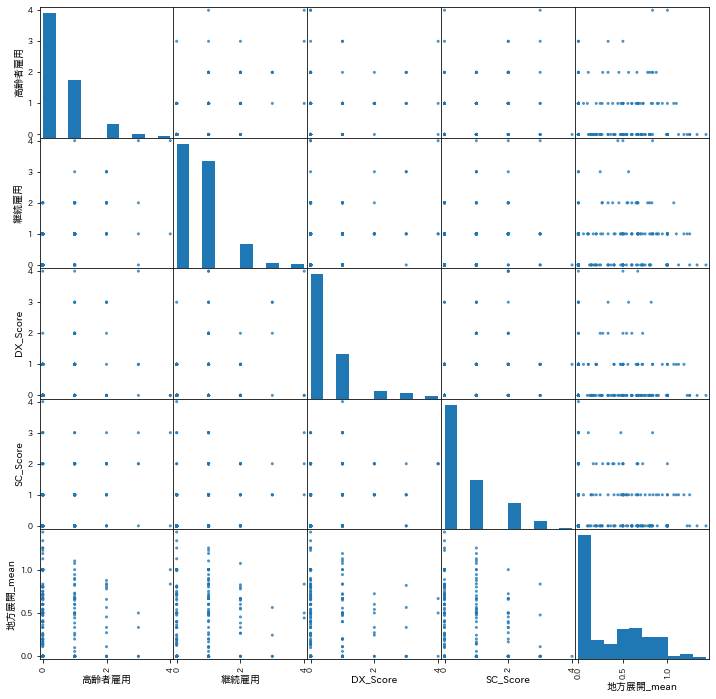

In [110]:
import japanize_matplotlib
from pandas import plotting

plotting.scatter_matrix(score_data, figsize = (12, 12), alpha = 0.8)

In [111]:
# sklearnの標準化モジュールをインポート
from sklearn.preprocessing import StandardScaler

# データを変換する計算式を生成
sc = StandardScaler()
sc.fit(score_data)

# 実際にデータを変換
z = sc.transform(score_data)

print(z)
print(z.shape)

[[-0.66287347  0.36896275 -0.56791784 -0.70277572  2.23673591]
 [ 1.9064945   1.59324822 -0.56791784  0.44579057 -0.95147124]
 [ 0.62181051  1.59324822 -0.56791784 -0.70277572  0.78755084]
 ...
 [ 1.9064945   1.59324822 -0.56791784  1.59435687  0.76270767]
 [ 0.62181051  0.36896275 -0.56791784 -0.70277572  0.8544363 ]
 [ 0.62181051  0.36896275 -0.56791784  0.44579057 -0.95147124]]
(219, 5)


In [112]:
# sklearnのFactorAnalysis(因子分析)クラスをインポート
from sklearn.decomposition import FactorAnalysis as FA

# 因子数を指定
n_components = 4

# 因子分析の実行
fa = FA(n_components, max_iter = 5000) # モデルを定義
fitted = fa.fit_transform(z) # fitとtransformを一括処理

print(fitted)
print(fitted.shape)

[[-2.48075095e-01 -1.06712196e+00  7.87591795e-01 -1.38267923e-01]
 [ 1.46441952e+00 -4.23701047e-01 -8.76563831e-01  4.35974659e-02]
 [ 7.95304394e-01 -1.19437045e+00  8.47220059e-02  6.90399744e-02]
 [-6.51467482e-01  2.35152620e-01  6.58226378e-02 -1.98423266e-01]
 [-4.86823408e-01  6.14897538e-01  4.06629093e-01 -8.32775142e-02]
 [-8.57494394e-01  1.09160375e-01 -3.47074912e-01  1.02766479e-01]
 [-6.37168271e-01  3.66502443e-02  2.93286892e-01 -2.83151751e-01]
 [-3.38798142e-01 -1.81161498e-02 -8.36675089e-01  4.90140506e-02]
 [-8.28895974e-01 -2.87844377e-01  1.07853596e-01 -6.66904915e-02]
 [-9.23602191e-02 -2.42695433e-01  4.00152156e-01 -1.41338923e-01]
 [ 7.65230996e-01  5.76881596e-01  1.58779863e-01 -1.92849822e-01]
 [-8.09830360e-01 -5.52514211e-01  4.11139267e-01 -1.79661805e-01]
 [-2.70583112e-01 -7.54664520e-01  4.29546210e-01 -4.89901092e-03]
 [-8.57494394e-01  1.09160375e-01 -3.47074912e-01  1.02766479e-01]
 [-3.38798142e-01 -1.81161498e-02 -8.36675089e-01  4.90140506e

In [113]:
# 変数Factor_loading_matrixに格納
Factor_loading_matrix = fa.components_.T

# データフレームに変換
pd.DataFrame(Factor_loading_matrix, 
             columns = ["第1因子", "第2因子", "第3因子", "第4因子"],# "第5因子"], 
             index = [score_data.columns])


第1因子      第2因子      第3因子      第4因子
高齢者雇用      0.773242 -0.060280 -0.182152 -0.015810
継続雇用       0.793377 -0.168096  0.074708  0.029580
DX_Score   0.446329  0.327055  0.230572  0.061585
SC_Score   0.493438  0.393070  0.022839 -0.085481
地方展開_mean  0.075275 -0.331990  0.298843 -0.088001

- 第1因子は高齢者雇用と継続雇用の因子得点が高くなっているので”雇用因子”  

- 第2因子はDX_ScoreとSC_Scoreの因子得点が高くなっているので、”DX推進＆スーパーシティ貢献因子"

- 第3因子は地方展開_meanの因子得点が高くなっているので、”地方展開因子”

In [114]:
df = score_data

In [115]:
df.describe()

高齢者雇用        継続雇用    DX_Score    SC_Score   地方展開_mean
count  219.000000  219.000000  219.000000  219.000000  219.000000
mean     0.515982    0.698630    0.461187    0.611872    0.364753
std      0.780185    0.818674    0.813927    0.872645    0.384235
min      0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000
50%      0.000000    1.000000    0.000000    0.000000    0.250000
75%      1.000000    1.000000    1.000000    1.000000    0.666667
max      4.000000    4.000000    4.000000    4.000000    1.433333

In [116]:
df_data = df
df_data.corr()

高齢者雇用      継続雇用  DX_Score  SC_Score  地方展開_mean
高齢者雇用      1.000000  0.610849  0.280900  0.356142   0.023994
継続雇用       0.610849  1.000000  0.319686  0.323507   0.136412
DX_Score   0.280900  0.319686  1.000000  0.350047  -0.012846
SC_Score   0.356142  0.323507  0.350047  1.000000  -0.078038
地方展開_mean  0.023994  0.136412 -0.012846 -0.078038   1.000000

Text(0, 0.5, 'eigenvalue')

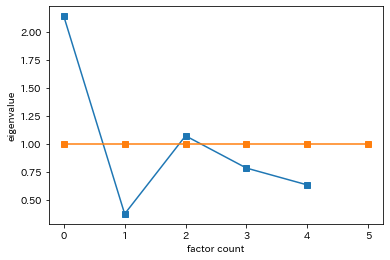

In [117]:
eigenvalue_one:np.ndarray = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
%matplotlib inline
plt.plot(np.linalg.eigvals(df_data.corr()), 's-')
plt.plot(eigenvalue_one, 's-')
plt.xlabel('factor count')
plt.ylabel('eigenvalue')

In [118]:
from factor_analyzer import FactorAnalyzer
columns = df_data.columns
n = 2

### PCA法による次元圧縮

In [119]:
#データフレームの設定
df = score_data

In [120]:
#標準化
dfs = df.iloc[:, 0:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfs.head()

高齢者雇用      継続雇用  DX_Score  SC_Score  地方展開_mean
0 -0.661358  0.368119 -0.566620 -0.701169   2.231623
1  1.902137  1.589607 -0.566620  0.444772  -0.949296
2  0.620389  1.589607 -0.566620 -0.701169   0.785751
3 -0.661358 -0.853368 -0.566620  0.444772   0.351989
4 -0.661358 -0.853368  0.661991  0.444772   0.351989

In [121]:
#主成分分析の実行
from sklearn.decomposition import PCA,TruncatedSVD
pca = PCA()
pca.fit(dfs)
# データを主成分空間に写像
feature = pca.transform(dfs)
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

PC1       PC2       PC3       PC4       PC5
0 -0.632271  2.343048  0.470113  0.231354 -0.448973
1  1.836572 -0.290791 -2.026481  0.000739 -0.028837
2  0.681972  1.486327 -1.052186 -0.413832 -0.623881
3 -0.857654  0.007147  0.419292  0.939013  0.123429
4 -0.328246 -0.232808  1.275210  0.286034  0.235925

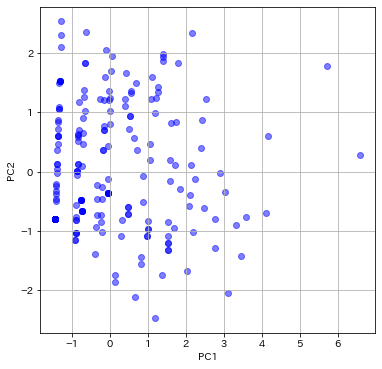

In [122]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], c="b", alpha=0.5, label="setosa") 
#plt.scatter(feature[50:99, 0], feature[50:99, 1], c="r", alpha=0.5, label="virginica") 
#plt.scatter(feature[100:149, 0], feature[100:149, 1], c="g", alpha=0.5, label="versicolor")
#plt.legend() #loc="upper left", fontsize=10
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [123]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

0
PC1  0.427252
PC2  0.214218
PC3  0.156745
PC4  0.126727
PC5  0.075057

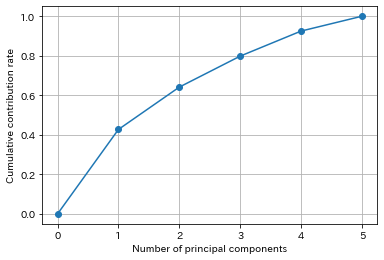

In [124]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

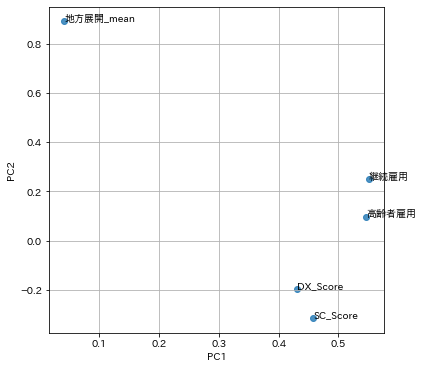

In [125]:
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], dfs.columns[0:]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [126]:
from sklearn.manifold import TSNE #ライブラリimport
transformed =  TSNE(n_components=2,perplexity=60, random_state=0).fit_transform(dfs) #可視化結果を左右するパラメータ
plt.figure(figsize=(6, 6))
plt.scatter(transformed[0:49, 0], transformed[0:49, 1], c="b", alpha=0.5, label="setosa") 
plt.scatter(transformed[50:99, 0], transformed[50:99, 1], c="r", alpha=0.5, label="virginica") 
plt.scatter(transformed[100:149, 0], transformed[100:149, 1], c="g", alpha=0.5, label="versicolor")
plt.legend()
plt.title("TSNE")
plt.grid()
plt.show()

## t-SNE法による次元圧縮＆クラスタ分析

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

In [128]:
elderly_empl = score_data['高齢者雇用'].tolist()
continued_empl = score_data['継続雇用'].tolist()
DX_score = score_data['DX_Score'].tolist()
SC_score = score_data['SC_Score'].tolist()

In [129]:
len_score_data = len(DX_score)

Z = [[]for i in range(len_score_data)]

for i in range(len_score_data):
    Z[i].append(elderly_empl[i])
    Z[i].append(continued_empl[i])
    Z[i].append(DX_score[i])
    Z[i].append(SC_score[i])
    Z[i].append(Local_expansion_score_means[i])
    
Z_reduced = TSNE(n_components = 2, random_state = 0).fit_transform(Z)

plt.scatter(Z_reduced[:, 0], Z_reduced[:, 1])

## 上のt-SNE散布図を見ると、明らかに2つのクラスターに分かれていることがわかるので、クラスタ分析を行う

In [130]:
#K-means Method
from sklearn.cluster import KMeans

cls = KMeans(n_clusters = 2)
result = cls.fit(Z_reduced)
plt.scatter(Z_reduced[:,0], Z_reduced[:,1],  marker = 'o', linewidth = 0.05, s = 15, c = result.labels_, alpha = 0.7)
plt.scatter(result.cluster_centers_[:,0], result.cluster_centers_[:,1], s = 40, marker = '*', c = 'red')
#plt.savefig('scatter_matrix', dpi = 2000)
plt.show()
#plt.savefig('第二スクリーニング_t-SNE', dpi = 2000)

In [131]:
cd /Users/shintaro/Downloads

/Users/shintaro/Downloads


In [132]:
#Gaussian Mixture Method
from sklearn.mixture import GaussianMixture

cls = GaussianMixture(n_components = 2).fit(Z_reduced)
labels = cls.predict(Z_reduced)
plt.scatter(Z_reduced[:,0], Z_reduced[:,1],  marker = 'o', linewidth = 0.05, s = 15, c = labels, alpha = 0.7)
#plt.savefig('クラスタリング_スコア', dpi = 2000)
#.savefig('第2スクリーニング_t-SNE', dpi = 2000)
plt.show()

l = GaussianMixture(n_components = 2).fit_predict(Z_reduced)

In [133]:
clustering = Z_reduced
cluster_id = []
for i in range(219):
    cluster_id.append(np.append(clustering[i], l[i]).tolist())

In [134]:
cluster_id

[[-9.804655075073242, 5.336670875549316, 1.0],
 [-13.161591529846191, -4.329238414764404, 1.0],
 [-9.225465774536133, -1.0781608819961548, 1.0],
 [0.9107720255851746, -0.5558115839958191, 0.0],
 [0.5282115936279297, -4.150857448577881, 0.0],
 [4.408339023590088, 7.629367828369141, 0.0],
 [1.5058627128601074, -0.8157542943954468, 0.0],
 [-1.9081965684890747, 5.362998962402344, 0.0],
 [6.966143608093262, 1.475913643836975, 0.0],
 [-12.294315338134766, 2.0226259231567383, 1.0],
 [-10.6350679397583, -8.057575225830078, 1.0],
 [8.312172889709473, 0.036791957914829254, 0.0],
 [-9.090295791625977, 4.940288543701172, 1.0],
 [3.186509609222412, 9.117427825927734, 0.0],
 [-1.9082096815109253, 5.362943172454834, 0.0],
 [-7.216784477233887, 4.3730082511901855, 1.0],
 [-10.837814331054688, -7.958085536956787, 1.0],
 [-12.308164596557617, 1.9934446811676025, 1.0],
 [-5.861199855804443, -9.238481521606445, 1.0],
 [4.832948684692383, 4.64815092086792, 0.0],
 [-13.61763858795166, -7.493558406829834, 1.

##### 今回のクラスター分析ではK-meansよりもGMMの方がパフォーマンスが高くなっている

In [135]:
model = GaussianMixture(n_components = 3).fit(Z_reduced)
color = ['b', 'g', 'r']

<Figure size 432x288 with 0 Axes>

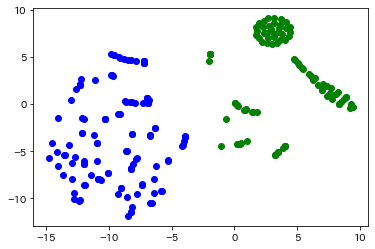

<Figure size 432x288 with 0 Axes>

In [136]:
for i in range(Z_reduced.shape[0]):
    plt.scatter(Z_reduced[i,0], Z_reduced[i,1], c = color[int(labels[i])])
    #plt.scatter(office_address_Dataframe[5], office_address_Dataframe[8], marker = 'D', s = 50, c = 'k', alpha = 0.8)
plt.figure()

In [137]:
l = labels.tolist()
for i in range(3):
    print(l.count(i))
    
#color = ['b', 'g', 'r']

122
97
0


In [138]:
print('各次元の寄与率: {0}'.format(pca.explained_variance_ratio_))
print('累積寄与率: {0}'.format(sum(pca.explained_variance_ratio_)))

各次元の寄与率: [0.42725237 0.21421822 0.15674528 0.12672749 0.07505663]
累積寄与率: 1.0


### 現段階では主成分分析とクラスター分析によるスクリーニングは分析段階なので今回は単純にスコアの順位でスクリーニングを行う

In [139]:
score_data

高齢者雇用  継続雇用  DX_Score  SC_Score  地方展開_mean
0        0     1         0         0   1.222222
1        2     2         0         1   0.000000
2        1     2         0         0   0.666667
3        0     0         0         1   0.500000
4        0     0         1         1   0.500000
..     ...   ...       ...       ...        ...
214      1     1         0         0   0.000000
215      0     0         0         0   0.000000
216      2     2         0         2   0.657143
217      1     1         0         0   0.692308
218      1     1         0         1   0.000000

[219 rows x 5 columns]

In [140]:
s1 = score_data['高齢者雇用']
s2 = score_data['継続雇用']
s3 = score_data['DX_Score']
s4 = score_data['SC_Score']
s5 = score_data['地方展開_mean']

In [141]:
s1 = np.array(s1)
s2 = np.array(s2)
s3 = np.array(s3)
s4 = np.array(s4)
s5 = np.array(s5)

In [142]:
score_all = s1 + s2 + s3 + s4 + s5

In [143]:
score_all.tolist()

[2.2222222222222223,
 5.0,
 3.6666666666666665,
 1.5,
 2.5,
 0.0,
 1.7999999999999998,
 1.0,
 0.6,
 2.6666666666666665,
 5.5,
 1.0,
 1.75,
 0.0,
 1.0,
 1.0,
 5.0,
 2.7,
 5.0,
 0.1428571428571428,
 8.0,
 0.0,
 0.0,
 4.666666666666667,
 1.0,
 1.5,
 5.1,
 6.442857142857143,
 4.942857142857143,
 2.0,
 4.0,
 2.0,
 13.5,
 4.555555555555555,
 0.0,
 2.6666666666666665,
 9.563636363636364,
 0.25,
 0.0,
 4.0,
 2.6,
 8.333333333333334,
 0.0,
 0.0,
 0.8,
 1.0,
 3.0,
 0.0,
 1.0,
 1.0,
 1.7285714285714286,
 4.0,
 5.2,
 3.0,
 0.0,
 6.454545454545454,
 1.1428571428571428,
 2.52,
 1.1666666666666665,
 6.721951219512195,
 0.0,
 1.25,
 0.0,
 0.4,
 0.7,
 0.0,
 0.125,
 2.8857142857142857,
 4.8375,
 0.0,
 1.5,
 4.875,
 7.2444444444444445,
 3.2666666666666666,
 5.0,
 0.5384615384615384,
 3.0,
 6.333333333333333,
 1.7219512195121953,
 8.0,
 0.0,
 2.4714285714285715,
 1.6,
 2.5,
 1.6666666666666665,
 2.3333333333333335,
 1.0,
 2.0,
 4.666666666666667,
 0.0,
 0.18,
 4.0,
 3.0,
 0.65,
 1.4333333333333331,
 0.0,


In [144]:
compname

['グンゼ',
 '日産自動車',
 '大和',
 'ゼンリン',
 '近鉄グループホールディングス',
 '小田急電鉄',
 'マルハニチロ',
 'マルシェ',
 '丸八証券',
 '参天製薬',
 'ファンケル',
 'ポート',
 '伊藤園',
 'ナック',
 'ケアサービス',
 'ヤオコー',
 '住友林業',
 '大日本住友製薬',
 '日本通運',
 '沖縄電力',
 'ローソン',
 'アンジェス',
 'ユーグレナ',
 'アステラス製薬',
 'ソフトバンク',
 '日機装',
 '東洋紡',
 '東芝',
 '宇部興産',
 '東武鉄道',
 'ユニ・チャーム',
 'マックスバリュ西日本',
 '富士通',
 '花王',
 'メドピア',
 'ルネサスエレクトロニクス',
 'キヤノン',
 'エス・エム・エス',
 'サンバイオ',
 'ＡＮＡホールディングス',
 '村田製作所',
 '住友商事',
 'いちよし証券',
 'ソースネクスト',
 '日本瓦斯',
 'ユナイテッド',
 'アスクル',
 'コシダカホールディングス',
 'キーエンス',
 '丸井グループ',
 '岡山県貨物運送',
 '住友ゴム工業',
 '日本郵船',
 '阪急阪神ホールディングス',
 'アクセルマーク',
 '丸紅',
 '石原産業',
 '住友理工',
 'オークネット',
 'ＫＤＤＩ',
 'ココナラ',
 'エイチ・アイ・エス',
 'ロイヤルホテル',
 'ニチリョク',
 '不二家',
 '光通信',
 '岩谷産業',
 'ブリヂストン',
 '昭和電工',
 '学情',
 'フロンティア',
 '帝人',
 '味の素',
 '前田建設工業',
 'アサヒグループホールディングス',
 'セリア',
 '新生銀行',
 '三菱商事',
 'アイカ工業',
 '大日本印刷',
 'ラクスル',
 '山九',
 'サイゼリヤ',
 'ファミリー',
 'トランコム',
 'シークス',
 'グリー',
 'フリー',
 '資生堂',
 'サンオータス',
 'リオン',
 'コンコルディア・フィナンシャルグループ',
 '出光興産',
 '住友ベークライト',
 '菊池製作所',
 '燦ホールディングス',
 '日本板硝子',
 'メニ

In [145]:
score_all_mean = score_all / 5
score_all_mean

array([0.44444444, 1.        , 0.73333333, 0.3       , 0.5       ,
       0.        , 0.36      , 0.2       , 0.12      , 0.53333333,
       1.1       , 0.2       , 0.35      , 0.        , 0.2       ,
       0.2       , 1.        , 0.54      , 1.        , 0.02857143,
       1.6       , 0.        , 0.        , 0.93333333, 0.2       ,
       0.3       , 1.02      , 1.28857143, 0.98857143, 0.4       ,
       0.8       , 0.4       , 2.7       , 0.91111111, 0.        ,
       0.53333333, 1.91272727, 0.05      , 0.        , 0.8       ,
       0.52      , 1.66666667, 0.        , 0.        , 0.16      ,
       0.2       , 0.6       , 0.        , 0.2       , 0.2       ,
       0.34571429, 0.8       , 1.04      , 0.6       , 0.        ,
       1.29090909, 0.22857143, 0.504     , 0.23333333, 1.34439024,
       0.        , 0.25      , 0.        , 0.08      , 0.14      ,
       0.        , 0.025     , 0.57714286, 0.9675    , 0.        ,
       0.3       , 0.975     , 1.44888889, 0.65333333, 1.     

In [146]:
dict = {'企業名': compname, '総合得点': score_all, '総合平均得点': score_all_mean}

In [147]:
Score = pd.DataFrame(dict)

In [148]:
Score

企業名      総合得点    総合平均得点
0               グンゼ  2.222222  0.444444
1             日産自動車  5.000000  1.000000
2                大和  3.666667  0.733333
3              ゼンリン  1.500000  0.300000
4    近鉄グループホールディングス  2.500000  0.500000
..              ...       ...       ...
214            ダスキン  2.000000  0.400000
215          タカラバイオ  0.000000  0.000000
216           三菱重工業  6.657143  1.331429
217            住友化学  2.692308  0.538462
218            北洋銀行  3.000000  0.600000

[219 rows x 3 columns]

In [149]:
Score_rank = Score.sort_values('総合得点', ascending = False)
Score_rank = Score_rank.reset_index()
del Score_rank['index']
Score_rank

企業名       総合得点    総合平均得点
0           富士通  13.500000  2.700000
1        トヨタ自動車  11.833333  2.366667
2          キヤノン   9.563636  1.912727
3         日立製作所   9.000000  1.800000
4          住友商事   8.333333  1.666667
..          ...        ...       ...
214         光通信   0.000000  0.000000
215        藍澤證券   0.000000  0.000000
216     ソースネクスト   0.000000  0.000000
217  さくらインターネット   0.000000  0.000000
218     アクセルマーク   0.000000  0.000000

[219 rows x 3 columns]

In [150]:
Score_rank.to_csv('第2スクリーニング_スコア順位(ver1.0).csv', encoding = 'Shift_JIS')

In [151]:
data = pd.read_csv('スーパーシティオープンラボ参加企業(R3.10現在).csv', encoding = 'Shift_JIS')
comp_SC = data['企業名'].tolist()

In [152]:
SC_comp = []
l = len(comp_SC)

for i in range(l):
    for j in range(len(compname)):
        if comp_SC[i] == compname[j]:
            SC_comp.append(comp_SC[i])

In [153]:
SC_comp

['東芝', '東京建物', '三井不動産', '住友商事', '東洋紡', 'ラック', 'ソフトバンク', '丸紅', '三菱電機']

In [154]:
len(comp_SC)

264

In [155]:
len(SC_comp)

9

In [156]:
comp_SC_tmp = []
comp = []
for i in range(len(comp_SC)):
    if comp_SC[i] in SC_comp:
        comp.append(comp_SC[i])
        
    else:
        comp_SC_tmp.append(comp_SC[i])

In [157]:
len(comp_SC_tmp)

255

In [158]:
from random import randint

comp_random = []

for i in range(41):
    point = randint(0, 255)
    comp_random.append(comp_SC_tmp[point])


In [159]:
comp_random_tmp = list(set(comp_random))

In [160]:
len(comp_random_tmp)

39

In [161]:
comp_random

['アジアクエスト',
 '電通',
 '富_通',
 '__製作所',
 'JMDC',
 '社会デザイン協会',
 'ダッソーシステム',
 'スマートドライブ',
 '三菱重_業',
 '三友環境総合研究所',
 'メディアオーパスプラス',
 'ブリスコラ',
 '有限責任監査法_トーマツ',
 'モルゲンロット',
 'デロイトトーマツフィナンシャルアドバイザリー合同会社',
 '読売旅_',
 '_本総合研究所',
 'ジャパンケーブルキャスト',
 'OSAKA愛鑑実_委員会',
 '綜合警備保障',
 '三菱地所',
 '九州計測器',
 '_中_務店',
 '国際航業',
 'サノヤスMTG',
 'NTTドコモ',
 'マスターカード・ジャパン',
 '_本財団',
 'ROOTs',
 'ROOTs',
 'NABLAS',
 'ティアフォー',
 'SKハイニックスジャパン',
 '_本_営',
 'キヤノンマーケティングジャパン',
 'PayPay',
 '三菱UFJリサーチ＆コンサルティング',
 'EY新_本有限責任監査法_',
 'ダッソーシステム',
 'ETA・AAL推進協議会',
 'セレンディクスパートナーズ']

In [162]:
comp_SC

['PID',
 '博報堂',
 '国際電気通信基礎技術研究所',
 'PicoCELA',
 'SKハイニックスジャパン',
 '新建築社',
 '東芝',
 '新経済連盟',
 'LIFULL',
 'ウフル',
 '__本電信電話',
 '東京海上_動_災保険',
 'メディアオーパスプラス',
 'KPMGモビリティ研究所',
 '_阪商_会議所',
 'シスコシステムズ',
 '森トラスト',
 'サノヤスMTG',
 '伊藤忠テクノソリューションズ',
 'エクサウィザーズ',
 '_本ユニシス',
 'IHI',
 'ミチクリエイティブシティデザイナーズ',
 '__本印刷',
 '関_経済連合会',
 '凸版印刷',
 'NTTドコモ',
 '_林組',
 'ノキアソリューションズ＆ネットワークス',
 '__製作所',
 'TIS',
 '_島建設',
 'Origin Wireless Japan',
 'リコージャパン',
 '富_通',
 '東京建物',
 'ティアフォー',
 '_鉄興和不動産',
 '清_建設',
 'NTTアーバンソリューションズ',
 'ZMP',
 '_本設計',
 '野村総合研究所',
 '_本電気',
 '三井不動産',
 'アクアイグニス',
 '_本総合研究所',
 '三井住友銀_',
 '三菱地所',
 'トランス・コスモス',
 'PayPay',
 '_本電信電話',
 '_本政策投資銀行',
 '三菱UFJリサーチ＆コンサルティング',
 'あいおいニッセイ同和損害保険',
 'タカラベルモント',
 'スマートシティ・インスティテュート',
 'KDDI',
 '住友商事',
 '産業精神保健研究機構',
 '東急',
 'みずほ銀_',
 '電線のない街づくり_援ネットワーク',
 '有限責任監査法_トーマツ（_阪事務所）',
 'センターピア',
 'キヤノンマーケティングジャパン',
 '東洋紡',
 '損害保険ジャパン_本興亜',
 'ラック',
 'スマートドライブ',
 'MONET Technologies',
 'アクロスロード',
 'DynaxT',
 'アクセンチュア',
 '賑わい創研',
 'アットホーム',
 'カナン',
 'グッドクリエイト',
 '東_本旅客鉄道',

In [163]:
compname

['グンゼ',
 '日産自動車',
 '大和',
 'ゼンリン',
 '近鉄グループホールディングス',
 '小田急電鉄',
 'マルハニチロ',
 'マルシェ',
 '丸八証券',
 '参天製薬',
 'ファンケル',
 'ポート',
 '伊藤園',
 'ナック',
 'ケアサービス',
 'ヤオコー',
 '住友林業',
 '大日本住友製薬',
 '日本通運',
 '沖縄電力',
 'ローソン',
 'アンジェス',
 'ユーグレナ',
 'アステラス製薬',
 'ソフトバンク',
 '日機装',
 '東洋紡',
 '東芝',
 '宇部興産',
 '東武鉄道',
 'ユニ・チャーム',
 'マックスバリュ西日本',
 '富士通',
 '花王',
 'メドピア',
 'ルネサスエレクトロニクス',
 'キヤノン',
 'エス・エム・エス',
 'サンバイオ',
 'ＡＮＡホールディングス',
 '村田製作所',
 '住友商事',
 'いちよし証券',
 'ソースネクスト',
 '日本瓦斯',
 'ユナイテッド',
 'アスクル',
 'コシダカホールディングス',
 'キーエンス',
 '丸井グループ',
 '岡山県貨物運送',
 '住友ゴム工業',
 '日本郵船',
 '阪急阪神ホールディングス',
 'アクセルマーク',
 '丸紅',
 '石原産業',
 '住友理工',
 'オークネット',
 'ＫＤＤＩ',
 'ココナラ',
 'エイチ・アイ・エス',
 'ロイヤルホテル',
 'ニチリョク',
 '不二家',
 '光通信',
 '岩谷産業',
 'ブリヂストン',
 '昭和電工',
 '学情',
 'フロンティア',
 '帝人',
 '味の素',
 '前田建設工業',
 'アサヒグループホールディングス',
 'セリア',
 '新生銀行',
 '三菱商事',
 'アイカ工業',
 '大日本印刷',
 'ラクスル',
 '山九',
 'サイゼリヤ',
 'ファミリー',
 'トランコム',
 'シークス',
 'グリー',
 'フリー',
 '資生堂',
 'サンオータス',
 'リオン',
 'コンコルディア・フィナンシャルグループ',
 '出光興産',
 '住友ベークライト',
 '菊池製作所',
 '燦ホールディングス',
 '日本板硝子',
 'メニ